<a href="https://colab.research.google.com/github/dustin-py/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_113_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

**Always start with imports**

In [0]:
# These will be your typical imports for just about any pandas project.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1: Simple Examples 

### 1.1 Concatenate
Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, `df1` and `df2`.

In [0]:
# Create df1
df1 = pd.DataFrame([['a',1],['b',1]], columns=['letter','number'])
df1

,letter,number
0,a,1
1,b,1


In [0]:
# Create df2
df2 = pd.DataFrame([['c',3],['d',4]],columns=['letter','number'])

In [0]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. Note that 'axis=0' is the default and doesn't have to be specified.
df3 = pd.concat([df1,df2],axis=0,ignore_index=True)
df3

,index,letter,number
0,0,a,1
1,1,b,1
2,2,c,3
3,3,d,4


In [0]:
# Finally, let's stick the dataframes next to each other using `concat`. 
# Here, `axis=1` indicates a column operation.
df4 = pd.concat([df1,df2],axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,1,d,4


### 1.2 Merge

Merging joins two datasets together based on a common key.

In [0]:
# stock names
names_dict = {'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']}
stockname = pd.DataFrame(names_dict)
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [0]:
# stock prices.
price_dict = {'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]}
openprice = pd.DataFrame(price_dict)
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [0]:
# Merge these dataframes.
named_stocks = pd.merge_ordered(openprice, stockname)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,AMZN,1703.34,Amazon
2,FB,51.45,Facebook
3,GOOGL,501.30,Google
4,MSFT,96.54,Microsoft


In [0]:
# Create a 3rd dataset of weekly highs
weekly_dict = {'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]}
week_high = pd.DataFrame(weekly_dict)
week_high

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


The 'on' parameter indicates a specific column that is contained in both dataframes. We use it to look up and copy information from the two df's into a combined df.

In [0]:
# Now merge that with the named stocks.
full_stocks = pd.merge(named_stocks, week_high)
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,AMZN,1703.34,Amazon,2050.49
2,FB,51.45,Facebook,60.79
3,MSFT,96.54,Microsoft,110.11


In [0]:
# Useing 'how='outer' to grab outliers
full_stocks = pd.merge(named_stocks, week_high, on='Symbol', how='outer')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,AMZN,1703.34,Amazon,2050.49
2,FB,51.45,Facebook,60.79
3,GOOGL,501.30,Google,NaN
4,MSFT,96.54,Microsoft,110.11
5,NFLX,NaN,NaN,303.22


In [0]:
# Or we can use how = 'left' 
full_stocks = pd.merge(named_stocks, week_high, on='Symbol', how='left')
full_stocks


,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,AMZN,1703.34,Amazon,2050.49
2,FB,51.45,Facebook,60.79
3,GOOGL,501.30,Google,NaN
4,MSFT,96.54,Microsoft,110.11


The 'how' parameter indicates what the portion of the selected dataframes to keep after the merge takes place.  
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

In [0]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

### 1.3 Reshape: `melt` and `pivot_table`



Why reshape data?

**Some libraries prefer data in different formats**



> For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).  
[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets)    
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

**Hadley Wickham: 'wide' format vs. 'tidy' format**  
From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
# Let's create a simple table.

index=['John Smith', 'Jane Doe', 'Mary Johnson']
columns=['treatmenta', 'treatmentb']


table_1 = pd.DataFrame(
    [[np.nan,2],
     [16, 11],
     [3,1]],
     index=index,
     columns=columns
)

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.   
The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
# This is an example of 'wide' format:
table_1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data.   
Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
# Exactly the same information can be displayed by transposing the table. 
# (this is also another form of 'wide' format)
table_2 = table_1.T
table_2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Table 3 is an example of 'tidy' format. It reorganises Table 1  to make the values, variables and obserations more clear.

Table 3 is the 'tidy' version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

**Table 1 --> Tidy**

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [0]:
# First, get the column names as a list.
cols = table_1.columns.to_list()

In [0]:
# Now get the index values as another list.
rows = table_1.index.to_list()

In [0]:
# For table 1, convert the index into a column using the `reset_index` method.
table_1 = table_1.reset_index()
table_1

,level_0,index,treatmenta,treatmentb
0,0,John Smith,NaN,2
1,1,Jane Doe,16.0,11
2,2,Mary Johnson,3.0,1


In [0]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy_1 = table_1.melt(id_vars='index',
                      value_vars=['treatmenta', 'treatmentb'])
tidy_1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# rename the columns
tidy_1 = tidy_1.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})
tidy_1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# shorten the `trt` values
tidy_1['trt'] = tidy_1['trt'].str.replace('treatment','')
tidy_1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Table 2 --> Tidy**

In [0]:
##### LEAVE BLANK --an assignment exercise #####

**Tidy --> Table 1**

The `pivot_table` function is the inverse of `melt`.

In [0]:
# Let's do it all in reverse.
wide_1 = tidy_1.pivot_table(index='name',
                            columns='trt',
                            values='result')
wide_1

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Tidy --> Table 2**

In [0]:
##### LEAVE BLANK --an assignment exercise #####

**Seaborn example**

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [0]:
# Plot this using seaborn
tidy_1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


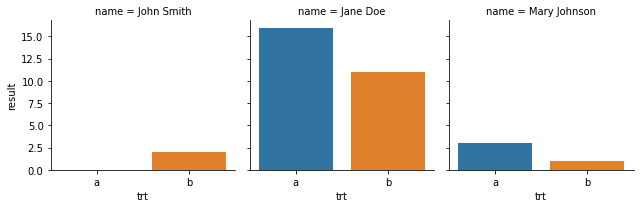

In [0]:
# with samuel norman seaborn
sns.catplot(x='trt',
            y='result',
            col = 'name',
            kind='bar',
            data=tidy_1,
            height = 3);

## Part 2: More complex examples 

### 2.1 Concatenating time-series datasets from Chicago

In [0]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [0]:
# Let's take a look at the first quarter.
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head(3)

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0


In [0]:
# how about the second quarter?
q2 = pd.read_csv(q2_path)

(1000, 12)


In [0]:
# Do they have exactly the same columns?
print(q1.columns,q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object') Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [0]:
# Let's define a function to check if they're REALLY equal.
def diff_check(list_1,list_2):
    diff = list(set(list_1) - set(list_2))
    diff
diff_check(q1.columns,q2.columns)    

In [0]:
# Now we're sure they're equal, let's concatenate them.
q1_q2 = pd.concat([q1,q2], axis=0)
q1_q2.shape

(2000, 12)

In [0]:
# Confirm that did what we wanted it to.


In [0]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

### 2.2 Merging datasets about counties
Original sources:  
https://www.kaggle.com/muonneutrino/us-census-demographic-data/download  
https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [0]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [0]:
# Read that into Pandas, and check out 5 rows.
src1 = pd.read_csv(source1)
src1.sample(5)

In [0]:
# What are all the columns?
src1.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [0]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
commute = src1[['CountyId','State','County','MeanCommute']]
commute.head()

,CountyId,State,County,MeanCommute
0,1001,Alabama,Autauga County,25.8
1,1003,Alabama,Baldwin County,27.0
2,1005,Alabama,Barbour County,23.4
3,1007,Alabama,Bibb County,30.0
4,1009,Alabama,Blount County,35.0


In [0]:
# What's the average commute in the USA?
commute['MeanCommute'].mean()

23.47453416149071

In [0]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [0]:
# Take a look at that new data.
src2 = pd.read_excel(source2)
src2.sample(3)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
2468,47081,TN,Hickman County,24690,1,Metro - Counties in metro areas of 1 million p...
934,20093,KS,Kearny County,3977,9,"Nonmetro - Completely rural or less than 2,500..."
633,17077,IL,Jackson County,60218,3,Metro - Counties in metro areas of fewer than ...


In [0]:
# What are those RUCC codes all about?
src2['RUCC_2013'].value_counts().sort_index()

1    472
2    395
3    369
4    217
5     92
6    597
7    434
8    220
9    425
Name: RUCC_2013, dtype: int64

In [0]:
# groupby rucc
# add [['column name']]
src2.groupby('RUCC_2013')[['Description']].max()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [0]:
# Let's shrink that USDA data to just the columns we need.
src2_FIX = src2[['FIPS','RUCC_2013']]
src2_FIX.tail(3)

,FIPS,RUCC_2013
3218,72149,2
3219,72151,1
3220,72153,2


In [0]:
# Let's merge that with our census data about commute times.
metro_commute = pd.merge(commute,src2_FIX,left_on='CountyId', right_on='FIPS', how='left')
metro_commute.sample(3)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
574,16047,Idaho,Gooding County,20.8,16047.0,7.0
1736,31165,Nebraska,Sioux County,18.9,31165.0,9.0
2236,41057,Oregon,Tillamook County,18.9,41057.0,6.0


In [0]:
# Is there any difference in commutes by rural-urban designation?
drive_times = metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()

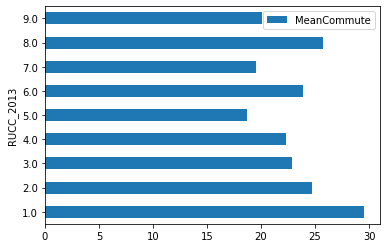

In [0]:
# Display that using the Pandas plotting function.
drive_times.plot(kind='barh');

## Part 3. Real-word Examples

### 3.1. Instacart  Dataset: `pd.concat` and `pd.merge`

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
# bash command: get a compressed file in 'tarball' format (this is similar to a .zip file)
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-12 02:54:34--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  56.2MB/s    in 3.6s    

2020-05-12 02:54:37 (54.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
# bash command: de-compress the tarball file (similar to `unzip`)
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
# bash command: navigate into the new folder.
# Percent sign == "magic" command which changes the underlying state (i.e., new current working directory).


In [0]:
# bash command: list the contents of that folder.


**Goal: Reproduce this example**

The first two orders for user id 1:

In [0]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)
display(example)

**Load data**

Here's a list of all six CSV filenames

In [0]:
# List the contents of the cwd.
%cd instacart_2017_05_01/
! ls -lh 

/content/instacart_2017_05_01
total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [0]:
# Read in the aisles dataset. Do we need anything from here? No, we don't.
pd.read_csv('aisles.csv')

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [0]:
# Read in the departments dataset. Do we need anything from here? Nope.
pd.read_csv('departments.csv')

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [0]:
# How about order_products? We need everything from this table except for reordered.
test = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')

In [0]:
# How is this differen from the previous one? Same as above.
# This file indicates a user's most recent order.
# the suffix '__train' vs '__prior' indicates it's been split for machine learning (train-test split)
# Given a user's order history, can you predict what they'll order next.


In [0]:
# How is this one different? Does it have anything we need?
# We need most of these columns, except 'days_since_prior_order' and 'eval_set'
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.sample(3)

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
315254,935125,19077,prior,21,6,11,7.0
3016470,1538032,182036,prior,7,1,20,7.0
3360140,1725850,202542,prior,6,1,22,30.0


In [0]:
# And products? We need 'product_name' and 'product_id'
products = pd.read_csv('products.csv')
print(orders.shape)
products.sample(3)

(3421083, 7)


,product_id,product_name,aisle_id,department_id
38116,38117,Pasta with Swedish Meatballs Tasty American Fa...,38,1
30914,30915,Linen Scent Bleach With Fabric Protection,75,17
3427,3428,Skillet Meals For 2 Chicken Biryani,38,1


In [0]:
display(example)

**Filtering: Get a subset of orders**

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [0]:
# let's look at the `orders` dataframe.
orders.sample(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2711225,166514,163294,prior,3,0,12,24.0
2339906,1967814,140873,prior,10,3,13,0.0
3370121,617730,203121,prior,17,4,13,2.0


In [0]:
# let's filter this dataframe to just the columns we need.
cols=['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders = orders[cols]
orders.head(3)

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12


In [0]:
# Now let's filter it to only certain rows. This will result in a series of boolean values.
condition = (orders['user_id'] == 1)

In [0]:
# Apply that condition to the orders dataframe.
print(orders[condition].shape)
orders[condition]

(11, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15
5,1,3367565,6,2,7
6,1,550135,7,1,9
7,1,3108588,8,1,14
8,1,2295261,9,1,16
9,1,2550362,10,4,8


In [0]:
# a more complicated condition.
comp_condition = (orders['user_id']==1) & (orders['order_number']<=2)
comp_condition.head()

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [0]:
# Turn that filtered dataframe into its own dataframe.
orders_subset = orders[comp_condition]
print(orders_subset.shape)
orders_subset

(2, 5)


,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


**Concatenate order_products__prior and order_products__train**

In [0]:
# check out their shape.
test.shape

(32434489, 4)

In [0]:
train.shape

(1384617, 4)

In [0]:
# concatenate them together
order_products = pd.concat([test,train], axis=0)
order_products.shape

(33819106, 4)

In [0]:
# Get a subset of `order_products` -- slim down this large dataset to only what I need (only 2 orders). 
condition_c = (order_products['order_id']==2539329) | (order_products['order_id']==2398795)
condition_c.head()

0    False
1    False
2    False
3    False
4    False
Name: order_id, dtype: bool

In [0]:
# Make a selection of columns
mycolumns = ['order_id','add_to_cart_order','product_id']

In [0]:
# Use the .loc method to filter rows and columns in a single blow.
order_products_subset = order_products.loc[condition_c,mycolumns]

In [0]:
order_products_subset

,order_id,add_to_cart_order,product_id
22742744,2398795,1,196
22742745,2398795,2,10258
22742746,2398795,3,12427
22742747,2398795,4,13176
22742748,2398795,5,26088
22742749,2398795,6,13032
24076664,2539329,1,196
24076665,2539329,2,14084
24076666,2539329,3,12427
24076667,2539329,4,26088


**Merge dataframes**

Merge the subset from `orders` with columns from `order_products`

In [0]:
# Both of these subsets are now quite small
print(order_products_subset.shape)
toast_crunch = pd.merge(orders_subset, order_products_subset,
                        on='order_id',
                        how='inner')
toast_crunch

(11, 3)


,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [0]:
# one more merge is needed 
final_toast_crunch = pd.merge(toast_crunch,products[['product_id', 'product_name']],
                              how='inner',
                              on='product_id')
final_toast_crunch

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [0]:
# what is their common key ('unique identifier')?


In [0]:
# merge the two df's on the common key.
# the 'on' parameter indicates a specific column that is contained in both dataframes.
# we use it to look up and copy information from the two df's into a combined df.


Merge with columns from `products`

In [0]:
# Merge with columns from products using `pd.merge`


In [0]:
# are we there yet?
display(example)

### 3.2 Instacart Dataset: `melt` and `pivot_tables`

**Goal: Reproduce part of this example**

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

In [0]:
# Read back in the datasets in their original form (no filters).
products = pd.read_csv('products.csv')

In [0]:
orders = pd.read_csv('orders.csv')

In [0]:
order_products = pd.concat((pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')))

**Subset and Merge**

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
# We only want the first two products.
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [0]:
# Subset the products dataframe to only those two.
condition_d = products['product_name'].isin(product_names)

In [0]:
# apply
products = products[condition_d]
products

,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [0]:
# I need to associate the hour of the day with a specific product.
# There's no common key between the `products` and `orders` df's to merge them.
# But `order_products` allows me to join them (aka, the `join` table.)
froyo_cream = (products[['product_id','product_name']]
               .merge(order_products[['order_id','product_id']]
                      .merge(orders[['order_id','order_hour_of_day']])))

In [0]:
# Subset all of that one more time.
froyo = froyo_cream[froyo_cream['product_name']==product_names[0]]
cream = froyo_cream[froyo_cream['product_name']==product_names[1]]

###3.3 Four ways to reshape and plot

**1. value_counts**

In [0]:
# How many orders included cream, in total and at each hour of the day?
cream['order_hour_of_day'].value_counts().sort_index()

0       6
1       1
2       1
4       1
5       4
6      25
7      95
8     323
9     480
10    429
11    292
12    200
13    213
14    215
15    222
16    218
17    111
18     56
19     28
20     32
21     23
22     12
23      8
Name: order_hour_of_day, dtype: int64

In [0]:
# Display that as percents rather than counts
cream_percent = cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

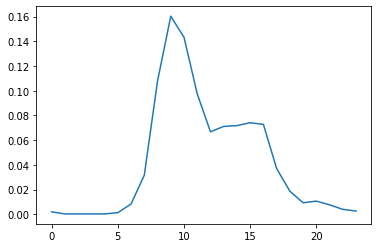

In [0]:
# Display that in a plot using Panda's built-in graphics library
cream_percent.plot();


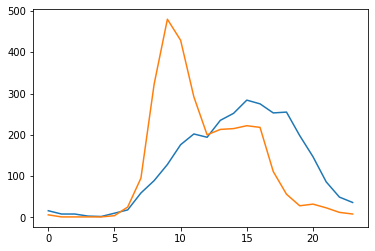

In [0]:
# Display products both together.
froyo['order_hour_of_day'].value_counts().sort_index().plot();
cream['order_hour_of_day'].value_counts().sort_index().plot();

**2. crosstab**

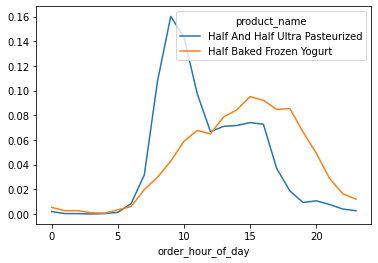

In [0]:
# You can get the same result using the `pd.crosstab` method
# But it generates a legend and requires fewer steps
pd.crosstab(froyo_cream['order_hour_of_day'],froyo_cream['product_name'],normalize='columns').plot();

**3. Pivot Table**

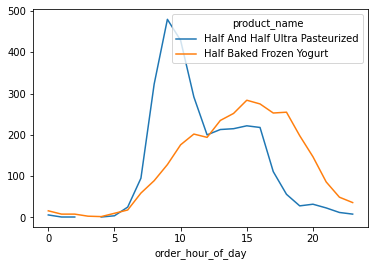

In [0]:
# and again, but with the `pd.pivot_table` method
froyo_cream.pivot_table(index='order_hour_of_day' ,
                        columns='product_name' ,
                        values='order_id' ,
                        aggfunc= len).plot();

**4. melt**

In [0]:
# Finally, what if we want to reshape the table?
# First, let's display it in `wide` format.
wide_table = pd.crosstab(froyo_cream['order_hour_of_day'],
                         froyo_cream['product_name'],
                         normalize=True)
wide_table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [0]:
# Now let's convert from wide to tidy format.
mycolumns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }


In [0]:
tidy_table = wide_table.reset_index().melt(id_vars='order_hour_of_day').rename(columns=mycolumns)

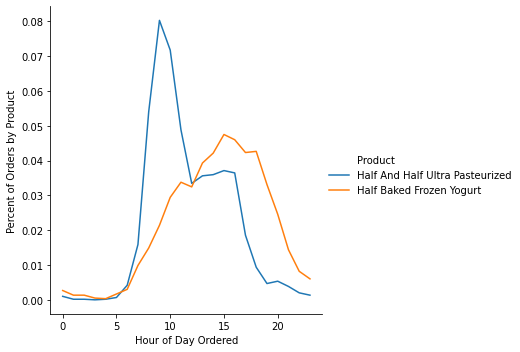

In [0]:
sns.relplot(x='Hour of Day Ordered',
            y='Percent of Orders by Product',
            hue = 'Product',
            data = tidy_table,
            kind = 'line');